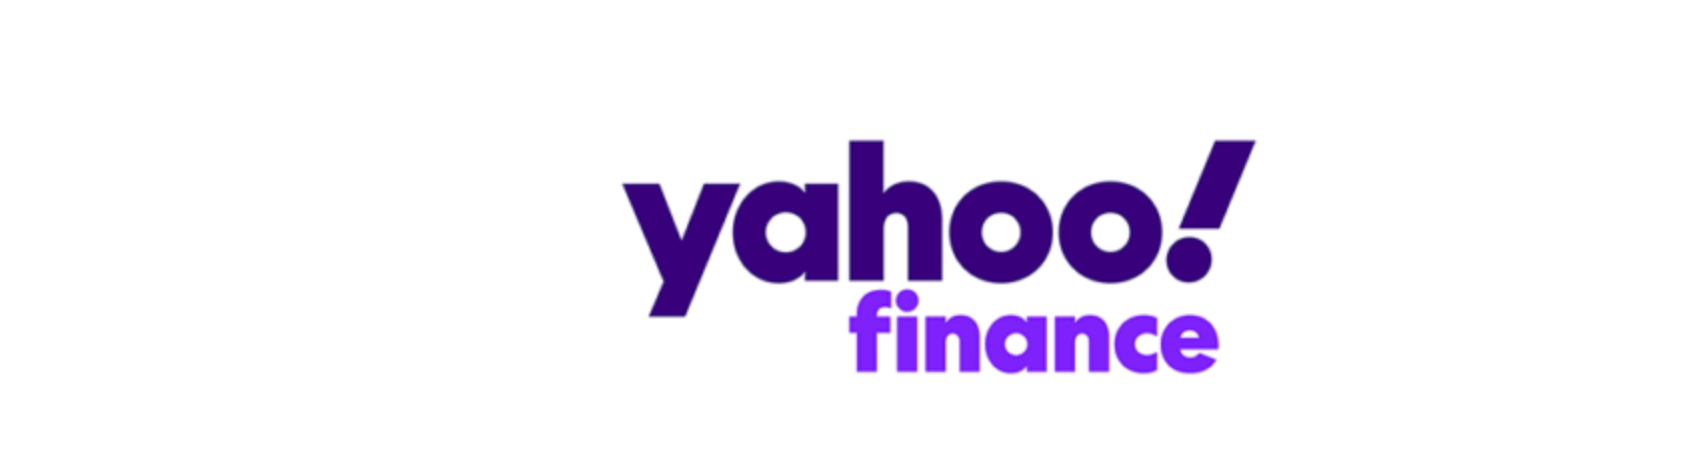

## Streaming Yahoo Finance Data with AWS Lambda
***


#### Overview:  
Data analysis of results from AWS Lambda SQL queries.  
Seaborn was used to generate visualizations and insights.  
All representd stock price data is from May 02, 2022. 

### Importing Libraries and Athena Query Results
***

In [28]:
import csv 
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
visuals_df = pd.read_csv('results.csv') 

### Question 1:

In [29]:
first_hour = visuals_df[(visuals_df.hourNum == 9)]
first_hour = first_hour.sort_values(by='highestPrice', ascending=False)

Text(0.5, 1.0, 'Highest Stock Price at First Trading Hour')

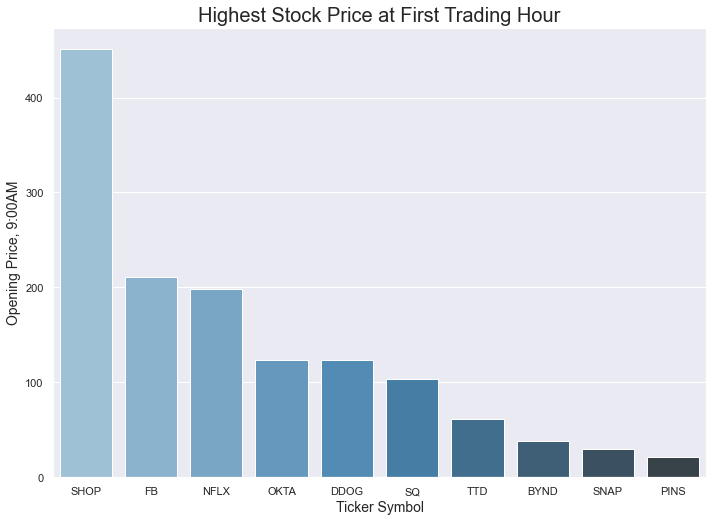

In [38]:
sns.set(font="Helvetica Neue")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="StockName", y="highestPrice", data=first_hour, palette="Blues_d")
ax.set_xlabel("Ticker Symbol", fontsize = 14)
ax.set_ylabel("Opening Price, 9:00AM", fontsize = 14)
ax.set_title("Highest Stock Price at First Trading Hour", fontsize = 20)

***
### Question 2:


In [58]:
price_trend = visuals_df.drop(columns=['ts'])

Text(0.5, 1.0, 'Highest Hourly Stock Price by Company')

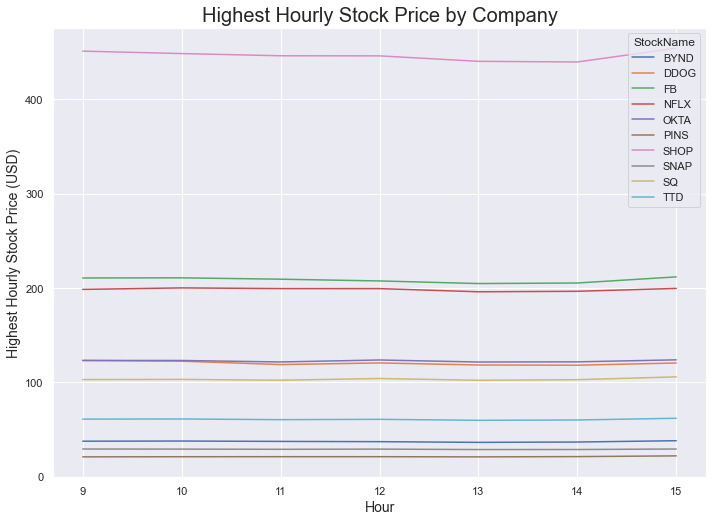

In [57]:
sns.set(font="Helvetica Neue")
sns.set(rc={'figure.figsize':(11.7,8.27)})
bx = sns.lineplot(data=price_trend, x="hourNum", y="highestPrice", hue="StockName")
bx.set_xlabel("Hour", fontsize = 14)
bx.set_ylabel("Highest Hourly Stock Price (USD)", fontsize = 14)
bx.set_title("Highest Hourly Stock Price by Company", fontsize = 20)


***
### Question 3:

In [59]:
first_hour = visuals_df[(visuals_df.hourNum == 9)]
last_hour = visuals_df[(visuals_df.hourNum == 15)]
open_close = first_hour.append(last_hour)

Text(0.5, 0.98, 'Open Price vs Close Price')

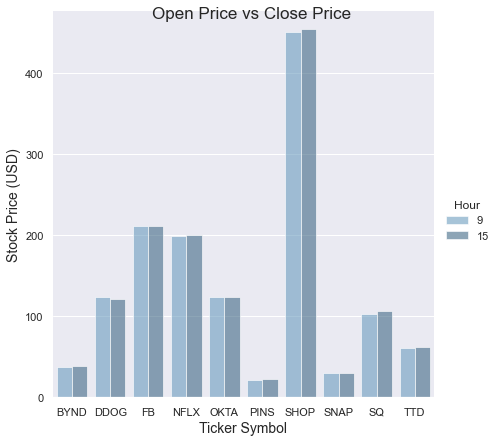

In [124]:
sns.set(font="Helvetica Neue")
sns.set(rc={'figure.figsize':(11.7,8.27)})
cx = sns.catplot(
    data=open_close, kind="bar",
    x="StockName", y="highestPrice", hue="hourNum",
    ci="sd", palette="Blues_d", alpha=.6, height=6)
cx.despine(left=True)
cx.set_axis_labels("Ticker Symbol", "Stock Price (USD)", fontsize=14)
cx.legend.set_title("Hour")
cx.fig.suptitle('Open Price vs Close Price', fontsize=17)

***
### Question 4:


<AxesSubplot:title={'center':'Mean Hourly Highest Stock Price'}, xlabel='Ticker Symbol', ylabel='Mean Price (USD)'>

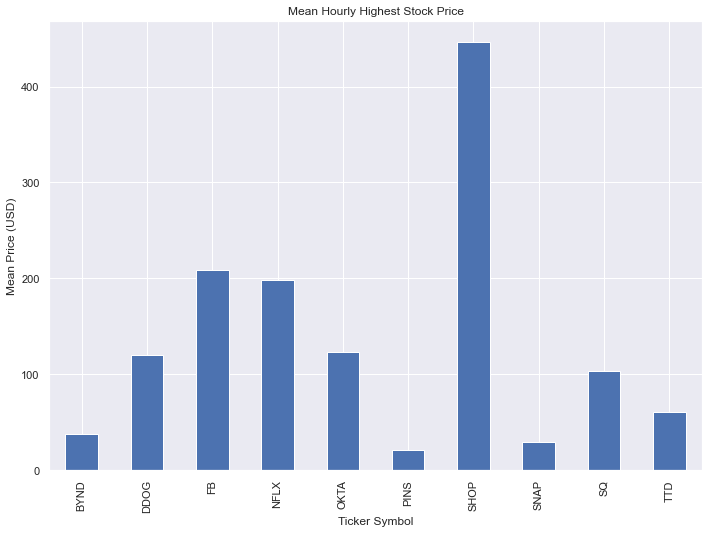

In [125]:
mean_price = visuals_df.groupby(['StockName'])['highestPrice'].mean()

sns.set(font="Helvetica Neue")
sns.set(rc={'figure.figsize':(11.7,8.27)})
mean_price.plot(kind='bar', title='Mean Hourly Highest Stock Price',  ylabel='Mean Price (USD)',
         xlabel='Ticker Symbol')
